In [1]:
pip install jupyter-dash -q

     |████████████████████████████████| 81kB 7.5MB/s 
     |████████████████████████████████| 1.0MB 23.2MB/s 
     |████████████████████████████████| 3.5MB 35.2MB/s 
     |████████████████████████████████| 92kB 9.6MB/s 
     |████████████████████████████████| 1.8MB 29.1MB/s 
     |████████████████████████████████| 358kB 42.3MB/s 


In [2]:
import pandas as pd
import plotly.express as px
pd.options.display.float_format = '{:,.2f}'.format

In [3]:
import pandas as pd
import os
os.getcwd()
from google.colab import drive
drive.mount('/content/gdrive')
os.chdir("/content/gdrive/My Drive/Colab Notebooks")

Mounted at /content/gdrive


In [4]:
# Colab 進行matplotlib繪圖時顯示繁體中文
# 下載台北思源黑體並命名taipei_sans_tc_beta.ttf，移至指定路徑
!wget -O taipei_sans_tc_beta.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download
!mv taipei_sans_tc_beta.ttf /usr/local/lib/python3.7/dist-packages/matplotlib//mpl-data/fonts/ttf

from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt 
# 自定義字體變數
myfont = FontProperties(fname=r'/usr/local/lib/python3.7/dist-packages/matplotlib/mpl-data/fonts/ttf/taipei_sans_tc_beta.ttf')
# !!!!後續在相關函式中增加fontproperties=myfont屬性即可!!!!

--2021-07-05 01:31:40--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 172.217.164.174, 2607:f8b0:4004:815::200e
Connecting to drive.google.com (drive.google.com)|172.217.164.174|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/pnriqk50du4jldsqtabme2nk40u5eibk/1625448675000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2021-07-05 01:31:41--  https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/pnriqk50du4jldsqtabme2nk40u5eibk/1625448675000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)... 142.251.33.193, 2607:f8b0:4004:837::2001
Connecting to doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)|142.251.33.19

In [5]:

"""
政府資料開放平台:基金投資運用情形
https://data.gov.tw/datasets/search?qs=%E6%8A%95%E8%B3%87%E9%81%8B%E7%94%A8%E6%83%85%E5%BD%A2        

xlsx下戴點:
新制
https://quality.data.gov.tw/dq_download_xlsx.php?nid=13222&md5_url=a32cfae6cf8760cff4669d3c18c99d8a

舊制
https://quality.data.gov.tw/dq_download_xlsx.php?nid=13230&md5_url=df3ff5a7586c29bb2b00bd93f69522b9

勞保
https://quality.data.gov.tw/dq_download_xlsx.php?nid=13223&md5_url=179fa582e56c3674e43aed1e94393793

國保
https://quality.data.gov.tw/dq_download_xlsx.php?nid=13227&md5_url=9b8c0714a1f6e3c55eb40d80268bc07e

積欠
https://quality.data.gov.tw/dq_download_xlsx.php?nid=13226&md5_url=d435f4d134fb55e93c2d7f89d25a2d78

就保
https://quality.data.gov.tw/dq_download_xlsx.php?nid=13224&md5_url=e26b1ecbcbcc346b5fb21c9a48605871

"""
import requests
import webbrowser
from bs4 import BeautifulSoup
import re
import csv
import os
import time
import urllib.request
import requests.packages.urllib3
requests.packages.urllib3.disable_warnings()

import pandas as pd
import matplotlib.pyplot as plt
#導入蠟燭圖套件
#import mpl_finance as mpf
from matplotlib.font_manager import FontProperties # 步驟一
from pylab import mpl
import datetime as dt
import zipfile


today_label=str(dt.date.today())
print(os.getcwd())

mpl.rcParams['axes.unicode_minus'] = False           # 解決儲存影象是負號'-'顯示為方塊的
font=FontProperties(fname=r'/usr/local/lib/python3.7/dist-packages/matplotlib/mpl-data/fonts/ttf/taipei_sans_tc_beta.ttf')

fund_list={
    '新制':'https://quality.data.gov.tw/dq_download_xlsx.php?nid=13222&md5_url=a32cfae6cf8760cff4669d3c18c99d8a',
    '舊制':'https://quality.data.gov.tw/dq_download_xlsx.php?nid=13230&md5_url=df3ff5a7586c29bb2b00bd93f69522b9',
    '勞保':'https://quality.data.gov.tw/dq_download_xlsx.php?nid=13223&md5_url=179fa582e56c3674e43aed1e94393793',
    '國保':'https://quality.data.gov.tw/dq_download_xlsx.php?nid=13227&md5_url=9b8c0714a1f6e3c55eb40d80268bc07e',
    '積欠':'https://quality.data.gov.tw/dq_download_xlsx.php?nid=13226&md5_url=d435f4d134fb55e93c2d7f89d25a2d78',
    '就保':'https://quality.data.gov.tw/dq_download_xlsx.php?nid=13224&md5_url=e26b1ecbcbcc346b5fb21c9a48605871'}
print(len(fund_list))

#for i in fund_list.items():
#  print(i)
 
for i in fund_list:
  print(i)
  print(fund_list[i])


/content/gdrive/My Drive/Colab Notebooks
6
新制
https://quality.data.gov.tw/dq_download_xlsx.php?nid=13222&md5_url=a32cfae6cf8760cff4669d3c18c99d8a
舊制
https://quality.data.gov.tw/dq_download_xlsx.php?nid=13230&md5_url=df3ff5a7586c29bb2b00bd93f69522b9
勞保
https://quality.data.gov.tw/dq_download_xlsx.php?nid=13223&md5_url=179fa582e56c3674e43aed1e94393793
國保
https://quality.data.gov.tw/dq_download_xlsx.php?nid=13227&md5_url=9b8c0714a1f6e3c55eb40d80268bc07e
積欠
https://quality.data.gov.tw/dq_download_xlsx.php?nid=13226&md5_url=d435f4d134fb55e93c2d7f89d25a2d78
就保
https://quality.data.gov.tw/dq_download_xlsx.php?nid=13224&md5_url=e26b1ecbcbcc346b5fb21c9a48605871


In [6]:
fund_name_list=list(fund_list.keys())
fund_url_list=list(fund_list.values())
fund_name_list
fund_url_list

['https://quality.data.gov.tw/dq_download_xlsx.php?nid=13222&md5_url=a32cfae6cf8760cff4669d3c18c99d8a',
 'https://quality.data.gov.tw/dq_download_xlsx.php?nid=13230&md5_url=df3ff5a7586c29bb2b00bd93f69522b9',
 'https://quality.data.gov.tw/dq_download_xlsx.php?nid=13223&md5_url=179fa582e56c3674e43aed1e94393793',
 'https://quality.data.gov.tw/dq_download_xlsx.php?nid=13227&md5_url=9b8c0714a1f6e3c55eb40d80268bc07e',
 'https://quality.data.gov.tw/dq_download_xlsx.php?nid=13226&md5_url=d435f4d134fb55e93c2d7f89d25a2d78',
 'https://quality.data.gov.tw/dq_download_xlsx.php?nid=13224&md5_url=e26b1ecbcbcc346b5fb21c9a48605871']

In [7]:
"""
for i in range(len(fund_name_list)):
  j="fund_M"+str(i)
  k="fund_Y"+str(i)
  vars()[j] = pd.DataFrame()
  print(j)
  print(k)
"""

'\nfor i in range(len(fund_name_list)):\n  j="fund_M"+str(i)\n  k="fund_Y"+str(i)\n  vars()[j] = pd.DataFrame()\n  print(j)\n  print(k)\n'

In [8]:
for index,i in enumerate(fund_list):  
  #for index, value in enumerate(my_list): 
  #  print(list((index, value))) 
  print(i)
  print(fund_list[i])

新制
https://quality.data.gov.tw/dq_download_xlsx.php?nid=13222&md5_url=a32cfae6cf8760cff4669d3c18c99d8a
舊制
https://quality.data.gov.tw/dq_download_xlsx.php?nid=13230&md5_url=df3ff5a7586c29bb2b00bd93f69522b9
勞保
https://quality.data.gov.tw/dq_download_xlsx.php?nid=13223&md5_url=179fa582e56c3674e43aed1e94393793
國保
https://quality.data.gov.tw/dq_download_xlsx.php?nid=13227&md5_url=9b8c0714a1f6e3c55eb40d80268bc07e
積欠
https://quality.data.gov.tw/dq_download_xlsx.php?nid=13226&md5_url=d435f4d134fb55e93c2d7f89d25a2d78
就保
https://quality.data.gov.tw/dq_download_xlsx.php?nid=13224&md5_url=e26b1ecbcbcc346b5fb21c9a48605871


In [9]:
for index,i in enumerate(fund_list):  
  #for index, value in enumerate(my_list): 
  #  print(list((index, value))) 
  print(index)
  print(i)
  print(fund_list[i])

0
新制
https://quality.data.gov.tw/dq_download_xlsx.php?nid=13222&md5_url=a32cfae6cf8760cff4669d3c18c99d8a
1
舊制
https://quality.data.gov.tw/dq_download_xlsx.php?nid=13230&md5_url=df3ff5a7586c29bb2b00bd93f69522b9
2
勞保
https://quality.data.gov.tw/dq_download_xlsx.php?nid=13223&md5_url=179fa582e56c3674e43aed1e94393793
3
國保
https://quality.data.gov.tw/dq_download_xlsx.php?nid=13227&md5_url=9b8c0714a1f6e3c55eb40d80268bc07e
4
積欠
https://quality.data.gov.tw/dq_download_xlsx.php?nid=13226&md5_url=d435f4d134fb55e93c2d7f89d25a2d78
5
就保
https://quality.data.gov.tw/dq_download_xlsx.php?nid=13224&md5_url=e26b1ecbcbcc346b5fb21c9a48605871


新制
https://quality.data.gov.tw/dq_download_xlsx.php?nid=13222&md5_url=a32cfae6cf8760cff4669d3c18c99d8a
https://quality.data.gov.tw/dq_download_xlsx.php?nid=13222&md5_url=a32cfae6cf8760cff4669d3c18c99d8a
PK  �q�R'�ts  �  :   新制勞工退休基金投資運用情形(按月份).xlsx}Ww<���BEզĨTUP�TlbլU�ڱW��4F̖�Ei�ګ���Jc�n��������}z����<�O�or]�{\���@�T�~6r��8H� P g ����W��W��q����54�ӣ.}P�S�Q���g�����=E�:o\~��hҾ�C$\Oe51IQ��������ri�FVNF�n��Pz�v��/���%���*�+�d�'�E��T�;�� ��n�代��"!�O��_��e6,˰�l�AyG�(D�w��^�Z�_z^�	�
�G���Z��{ؔ��d�r*����J%sZ�_��i��h;jǪ���9K��تϝ7�>����O��w��e�c�5����bx��W��T�bV�Jd���k���|�~��E$tk>0[�Q��� ���+ֱ{����G\�$	.B��4{����C8x{#~������)N7󃅜 ׋-�p�q�"�����\� ����f�ԅK���r��YuI,�hMKﶘ�*�1�ߙ�y�bd��s��X&���A�]2/wU�����̩V��F:u9��г1Cg�_:m<��t��٪���On
&���k����&��.����pl�+������� ���������mL�{D'��w�(�Et����i�\5ݰ3K�T�bsשi��>�^Xnh��˫��Rc�"�<n�",�T\�+��N��@����:%�n	��U�8?u�e��g�$�mMW�g!�!t���]�Sôs1�E,��\���k��F�
�ĝG

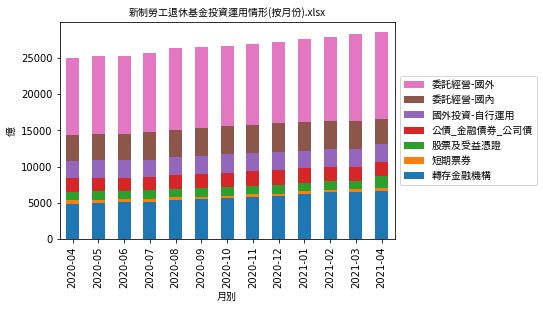

(16, 7)


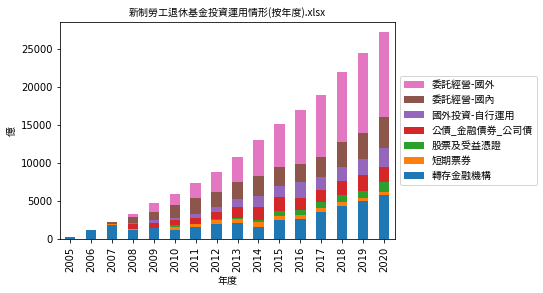

舊制
https://quality.data.gov.tw/dq_download_xlsx.php?nid=13230&md5_url=df3ff5a7586c29bb2b00bd93f69522b9
https://quality.data.gov.tw/dq_download_xlsx.php?nid=13230&md5_url=df3ff5a7586c29bb2b00bd93f69522b9
�\�"�����T�c�(�H��qhW]��-��۫1UC�[��4�-[�k8�t�g�M�ʵ�
h�E0(�s,����%��*4Kxrз:�����jÙ�d@�^�B<I�&!׷7�1a�M\g5�7ᗖ3n��\�'��������gLPƆ8t$��MȊI��!w��@����ˢ[T��}V��*:�>.�]�ֺݞ��;������
�O���fv���}�	�_3��6	Y�e��r�h�n����˞��u��oa�8���)�qB;f�J%��P:?�6����3K.�tQ==:ML��ĪJY��h��Q�3�	�^4\np6�D��s�	H�޶F�1U�@���*�a2l[�1%�cj��PX.���Xѵ@�/n�Gݳ���B��{ݘN�yW?�1�&8���͙4`
ǞQM���]C!��
�'b
K%�s×����c,�2��H�i��(��g��~��*g6��h'�NN�?7�?���[�_��4)�o���������x�ͬ�dR�kĢ7(ƧC�e��΀��ؠ�Ꙗ�0_�g�$�ϑ@����"V;���F�*a�FN��]����f�kl��y)�<d���PG� ϊv9w3e�� ��ϫ��EN�-
�����Z�*УlQ\p������Tf�,����ۂI�B�u�>�坑*��B�ԛs
��7��'"�b#�m
���$Cy�L{x���;��6Rb��ee�r��v�c�j���K�a֝�a|�_���봢Q؊���Y�
�V�����B	�z�>ce�w����A��M�E��7��J�!|4�'n�w�i�<�����zl%�B�\]%

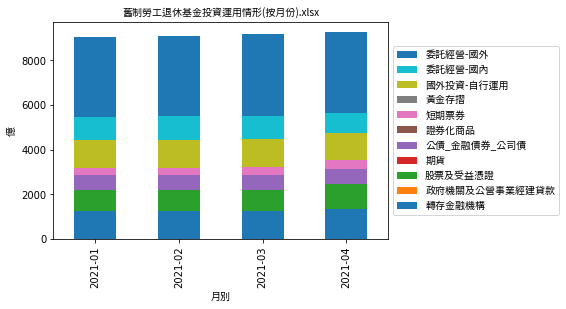

(33, 11)


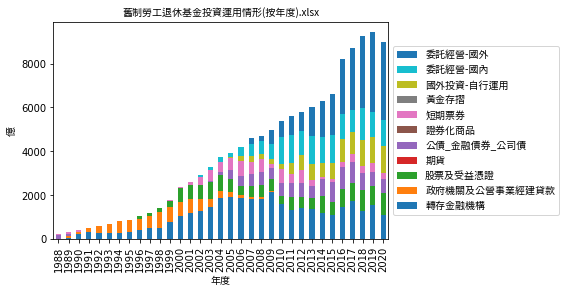

勞保
https://quality.data.gov.tw/dq_download_xlsx.php?nid=13223&md5_url=179fa582e56c3674e43aed1e94393793
https://quality.data.gov.tw/dq_download_xlsx.php?nid=13223&md5_url=179fa582e56c3674e43aed1e94393793
7�q9�򟤬\�_�Љ�:�¸�@2RB+�a�,&moɡ\��g[#��<S_϶X�e�*t�0ȯ���
�cO����%����DY�����{��:��a��kM���lh�E/@%/����=G��� ϪNwh ��HdΫ����c�(�����\��SyXT��\�\-Nk�Z%���
���JQl:��|��M3>�SFI.(�#unڏ��5I�C�ât[���C£Jч @
 ���0;��C�A�"{u}�{���	���SSy젢.U��i����>O~CB��t3�]�)�G�z��H���	%�N��rV��5���p~�A����S�+�揿Ib�I1;�q��_���g�C{=;��_z���y��@����W/�t����Z��z}niIH���l��>&����s���U� ��c+�a�EIɈl��,˛Q&f�#I�������m
�����إw/���&�V!س��*d�Osט�x�m��F�c�Þ�dt�R3��s�Psq�&e�s��ӣ��䃾-���[��r�������o��X^[��h�{��~������y�-���^.����or/��n�NL���DG���h�>��2��R.-k�J�����LY?����<��~笮�.�`��|�3o@���xx	h�>����_�{��	��p�N��h�;4c�0	�ޤr֌�3����љM����^�c�N�Zw��|kml2�Ŷs� K�c���YCM��V�0���eO�WHNH�H��j�-�
eE}_�m�*����� �G������
+Рu�����P-�G%�a�d�M5mF�)�hw����C

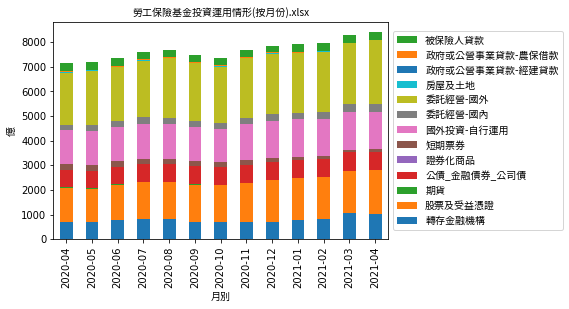

(22, 14)


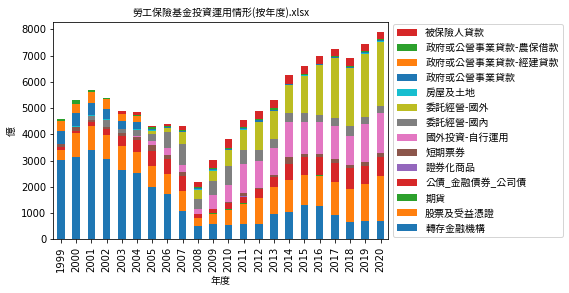

國保
https://quality.data.gov.tw/dq_download_xlsx.php?nid=13227&md5_url=9b8c0714a1f6e3c55eb40d80268bc07e
https://quality.data.gov.tw/dq_download_xlsx.php?nid=13227&md5_url=9b8c0714a1f6e3c55eb40d80268bc07e
PK  R��R��00_  �  :   國民年金保險基金投資運用情形(按月份).xlsx}XuXT���n�)��[�NIi��b�DBB`��A��[)��A�S@`DJJJ�;�������9�9��qֻ�����F��p�� �IԲ	�"3@ P� �  kU�������i�����P��GCʠ[�B���gM���Bg�eZ�(��'Ѭ}_��X/���,�����Р��}�-��[D�L�
0~9�M�T��o|����v��S�vǩ��=���\?z�9�B��R](�����+�������3�/8��w���ߎ�b�;L&do^��"���y��Q�Ŝ�b�|%
���vS"P&�_cSk6adٔ&HV}������x�l�6'#f�"��6o"z$5m7��vc���"moU8��ɭ��K����B�Hс����<��=�ޤ�$����e'��B�c��D}�#��?3b�=\�d��bLk����+,��]�ҩ��x�sJ�~���V��!Ե�f.�'�La�����Lm�\��}���$w�-�4 �'hXz����.�CA(�Ŧx���{R#�|M�]���dE�M&3$k��"��t�1]s����*pȝ�b�P_ W���=��#�W{��ưn�%�C�)��7�'���8�쇖��<������U���*����{Xĸi��9T�&��������/k�\>�%Ƌ�!�]�a�?П�2@��d�~JB�y����|�޾��?Ǩ~R'Q����9�i��!��w?ʯ��-N��[l%�ς�E���<�����pBk�m?p�|���:׃-��틾N�

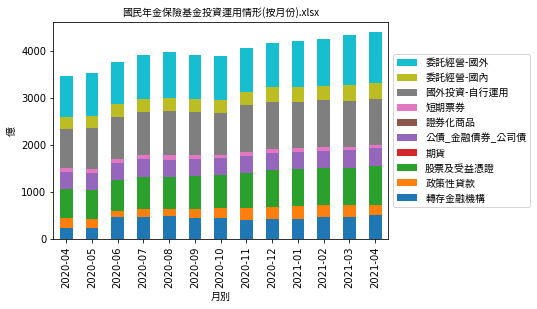

(13, 10)


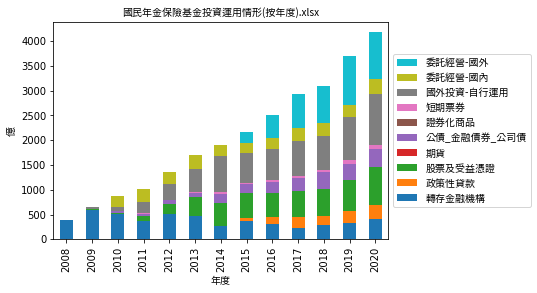

積欠
https://quality.data.gov.tw/dq_download_xlsx.php?nid=13226&md5_url=d435f4d134fb55e93c2d7f89d25a2d78
https://quality.data.gov.tw/dq_download_xlsx.php?nid=13226&md5_url=d435f4d134fb55e93c2d7f89d25a2d78
PK  U��RNi��  
  :   積欠工資墊償基金投資運用情形(按月份).xlsx}W4\�m&�De��h�(�N�����(5Zt�.J�K�D��ѢE/�!��ƻ�-/��{�s�u�:�^������~�{D�t B�%�A�w]��ToU @� �  &�.Ξ�Ξ����f��cmJ�f�0�2�$�Ǆ��:�F}�$�K?? ��'֠e��s?��� Qn����`�]�xӁ�AU��ʉ����$N��6.1�;/��
�F���S����ޗ��Zŋ;x��(��#�9Bx
���F&:d����ZIn�_��	�TUf!�T �nB��Hor��Y(0�i����ۍm�x�W��;^�-��%:�v/���@��)m"�	�&A�[�?_o��2-:�n@o�/�`���{�C��Y�ݳ�	8:0}S
2��.hE�6{�U��=\)�y�U�m��~�S}U�.%�O����>�7�!�Y�t�ð,8w��+ԺK����˹���q���ħƭG!w��..��j5:�S|;�'��4#���Ȭ�����
#�c��Q�fӸ��8���F���ʢ( ֌�
���&�:��k����D]�4� 6��aEg��ZD_e����̤����������;t��i�"�<ao��1Nع{�ę�<g�s�O7d�t�m�:�׼��4�>)�TT�2�M����#�ہ\��1�*vw�&F�	
� nU+�8��B\����'�\�Ӵk�᏾>O�8����n	Uj)�;e4�����ヽX�!��z��P�|�y��>E��q���#�����Ӄ�Wg��,L?�t���mp��#���0�

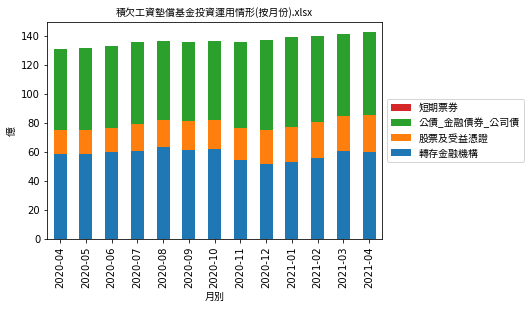

(13, 4)


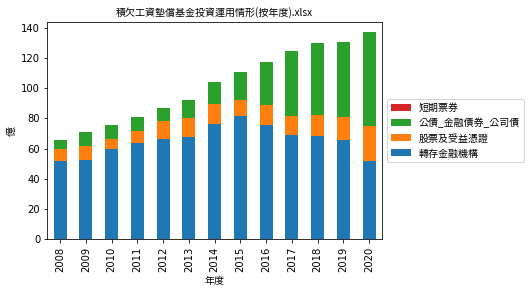

就保
https://quality.data.gov.tw/dq_download_xlsx.php?nid=13224&md5_url=e26b1ecbcbcc346b5fb21c9a48605871
https://quality.data.gov.tw/dq_download_xlsx.php?nid=13224&md5_url=e26b1ecbcbcc346b5fb21c9a48605871
�  -Z �  ��Fy�"<},��>ph��{%o�,ͩK�G��ka�Fct	���C�D�,f�&sYZ&i��󐺻��	����������F&�Pݤ��Q���{J{9�O�!O�*����?�&�N���O|��d��,��K�����
����w�T$�zD�+��RANip�^��+CY���/8y#��3I���C�R3��wi��\��JhҩS��5��,��Დb��d���~�I�]�X�����a���%�N\��m}���f��I����Q� �a��tS�{�&}��p���R����|E��.��Vd�|�w� ��h��d`���WC ��!�hS�q��O���]m�.N!����K��ݜP(�#��Lk=��Y��Q��L�s��b�w<��
�!/r+�f/����i�� �A?8�%��^��~�(��`qh�cV���COc�>-���.q{?/�t��d8��Z;��~e\c���&,�|9�|�f��F�����g_P���>�����g:��w��)4�P�����kj������PD��u5�N�e��퇋��U5�5�*bWXG���i�ic��o���{�.�����N��<�V�����8j�s�.�� r� _# �nY�q���������
�0+�
$@��"�%�ubx��jq\��B�5�r��_yx�b%��
�'�P��eo� ǞT�Ə�}��V���oN�'ϼ�-Ӻ���fJ�:��-���)��bA�_�@��dU+u�2�H�H��Wm�5��*n	���q$�`mc�u"t{���0�Nk���aW1p3����

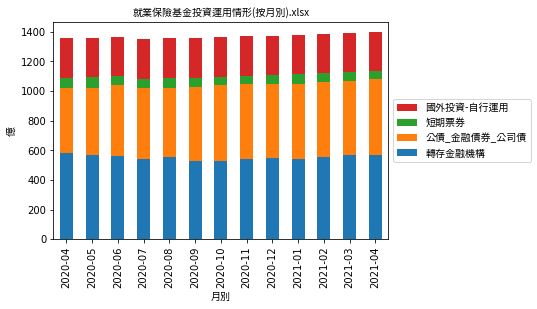

(18, 4)


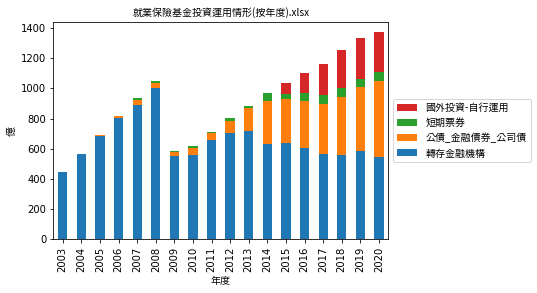

In [10]:

for index,i in enumerate(fund_list):  
  #for index, value in enumerate(my_list): 
  #  print(list((index, value))) 
  print(i)
  print(fund_list[i])
  
  url=fund_list[i] 

  headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36'}
  r=requests.get(url,headers=headers,verify=False) 
  print(r.url)
  print(r.text)
#webbrowser.get(url) 
  print(type(i))
  outfile=str(i)+".zip"
  
  with open(outfile,'wb') as f: 
    f.write(r.content)
    print(outfile,'已順利存檔')

  zipFile = zipfile.ZipFile(os.path.join(os.getcwd(),outfile))
  zipFile.printdir()

  in_file=[]
  for file in zipFile.namelist():
    zipFile.extract(file, r'C:/Users/user/.spyder-py3')
    in_file.append(file)
  zipFile.close()


#in_file=['新制勞工退休基金投資運用情形(按月份).xlsx','新制勞工退休基金投資運用情形(按年度).xlsx']


  for i in in_file:
    file_name="C:/Users/user/.spyder-py3/"+i
    df=pd.read_excel(file_name)
    #print(df)
    #print(type(df))
    
    #df_formate=pd.DataFrame(df[::-1])
    
    #df_formate = df.iloc[:,::-1]
    df_formate_tmp=pd.DataFrame(df)
    
    #y = txt.find("yeah")
 #    if i=='新制勞工退休基金投資運用情形(按月份).xlsx':
 #     df_formate=df_formate_tmp.set_index('月別')
 #   else:
 #     df_formate=df_formate_tmp.set_index('年度')
    if i.find('按月')>0:
      df_formate=df_formate_tmp.set_index('月別')
      df_formate=df_formate/100000000 
      j="fund_M"+str(index) #str(index)
      #vars()[j] = pd.DataFrame(df_formate)
      globals()[j] = pd.DataFrame(df_formate)
    else:
      df_formate=df_formate_tmp.set_index('年度') 
      df_formate=df_formate/100000000 
      k="fund_Y"+str(index) #str(index) 
      #vars()[k] = pd.DataFrame(df_formate) 
      globals()[k] = pd.DataFrame(df_formate)     
    #df_formate=df_formate/100000000  
    print(df_formate.shape)
    


    df_formate.plot(kind='bar', stacked=True)  # ,labels='labels')  #,legend=True
    #df_formate.plot(x='月別',kind='bar', stacked=True)  #
    plt.title(i,fontproperties=font)
    plt.ylabel('億',fontproperties=font)
   
    #plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    
    current_handles, current_labels = plt.gca().get_legend_handles_labels()
    #current_handles = plt.gca().get_legend
    reversed_handles = list(reversed(current_handles))
    reversed_labels = list(reversed(current_labels))
    
    # call plt.legend() with the new values
    

    plt.legend(reversed_handles,reversed_labels,loc='center left', bbox_to_anchor=(1, 0.5),prop=font)
    plt.xlabel(df_formate.index.name,fontproperties=font)
    #plt.legend(reversed_handles,reversed_labels,loc='center left'   #,reversed_labels)
    #ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.savefig("C:/Users/user/.spyder-py3/"+i+today_label+".png",dpi=300,bbox_inches='tight')    
                         
    plt.show()



In [11]:
dfs_M = {"fund_M0" : fund_M0, "fund_M1": fund_M1,"fund_M2":fund_M2,"fund_M3":fund_M3,"fund_M4":fund_M4,
"fund_M5":fund_M5} #, "df3" : df3, "df4" : df4, "df5" : df5}

dfs_Y = {"fund_Y0":fund_Y0,"fund_Y1":fund_Y1,"fund_Y2":fund_Y2,"fund_Y3":fund_Y3,"fund_Y4":fund_Y4,"fund_Y5":fund_Y5}


In [12]:
key_list_m = list(dfs_M.keys())
val_list_m = list(dfs_M.values())

In [13]:
val_list_m[0]

,轉存金融機構,短期票券,股票及受益憑證,公債_金融債券_公司債,國外投資-自行運用,委託經營-國內,委託經營-國外
月別,,,,,,,
2020-04,"4,907.44",465.56,"1,180.06","1,815.33","2,420.52","3,609.76","10,524.03"
2020-05,"4,987.31",452.19,"1,174.26","1,803.27","2,494.15","3,610.47","10,703.54"
2020-06,"5,081.22",438.02,"1,153.63","1,818.47","2,425.78","3,639.67","10,748.37"
2020-07,"5,190.12",403.41,"1,146.85","1,860.90","2,368.27","3,767.26","10,886.13"
2020-08,"5,376.46",369.79,"1,158.98","1,897.49","2,473.39","3,827.04","11,203.56"
2020-09,"5,497.42",374.27,"1,193.53","1,972.58","2,475.62","3,858.65","11,093.29"
2020-10,"5,607.42",369.60,"1,221.46","1,986.73","2,544.18","3,861.99","11,008.72"
2020-11,"5,823.34",363.15,"1,197.11","1,973.67","2,516.16","3,886.26","11,125.23"
2020-12,"5,889.65",371.20,"1,240.46","1,971.61","2,510.21","4,054.77","11,186.65"


In [14]:
key_list_y = list(dfs_Y.keys())
val_list_y = list(dfs_Y.values())

In [15]:
"""
position = fund_name_list.index('新制')
print(key_list_m[position])
print(val_list_m[position])
print(val_list_m[position].sum(axis=1))
"""

"\nposition = fund_name_list.index('新制')\nprint(key_list_m[position])\nprint(val_list_m[position])\nprint(val_list_m[position].sum(axis=1))\n"

In [16]:
from jupyter_dash import JupyterDash  #import dash:jia del
import plotly.express as px
import dash_core_components as dcc
import dash_html_components as html
import plotly.graph_objs as go
from dash.dependencies import Input, Output


app = JupyterDash(__name__)

app.layout = html.Div(children=[
    html.H1(children='經管基金-資產配置'),
    dcc.Dropdown(id='fund-dropdown',
                 options=[{'label': i, 'value': i}
                          for i in fund_name_list],
                 value='新制'), #fund_M0'),
                     #出現在app.callback:
                     #Input(component_id='geo-dropdown', component_property='value')
    dcc.Graph(id='fund-graph')#,figure=fig)  #出現在app.callback: 
                    #Output(component_id='price-graph', component_property='figure'),
])

@app.callback(
    Output(component_id='fund-graph',component_property='figure'),
    Input(component_id='fund-dropdown',component_property='value')
)
def update_graph(selected_fund):  #參數為user選定的值
    #filtered_avocado = avocado[avocado['geography'] == selected_fund]
    position=fund_name_list.index(selected_fund)
    
    df=val_list_m[position]
    
    res = []
    for col in df.columns:
      res.append(
          go.Bar(
              x=df.index.values.tolist(),
              y=df[col].values.tolist(),
              name=col
                 )
                       )

    layout = go.Layout(barmode='stack') #barmode='group' )

    fig = go.Figure(data=res, layout=layout)
    
    return fig


if __name__ == '__main__':
    app.run_server(debug=True)

Dash app running on:


<IPython.core.display.Javascript object>

In [17]:
from jupyter_dash import JupyterDash  #import dash:jia del
import plotly.express as px
import dash_core_components as dcc
import dash_html_components as html
import plotly.graph_objs as go
from dash.dependencies import Input, Output


app = JupyterDash(__name__)

app.layout = html.Div(children=[
    html.H1(children='經管基金-資產配置'),
    dcc.Dropdown(id='fund-dropdown',
                 options=[{'label': i, 'value': i}
                          for i in fund_name_list],
                 value='新制'), #fund_M0'),
                     #出現在app.callback:
                     #Input(component_id='geo-dropdown', component_property='value')
    dcc.Graph(id='fund-graph')#,figure=fig)  #出現在app.callback: 
                    #Output(component_id='price-graph', component_property='figure'),
])

@app.callback(
    Output(component_id='fund-graph',component_property='figure'),
    Input(component_id='fund-dropdown',component_property='value')
)
def update_graph(selected_fund):  #參數為user選定的值
    #filtered_avocado = avocado[avocado['geography'] == selected_fund]
    position=fund_name_list.index(selected_fund)
    
    df=val_list_m[position]
    
    res = []
    for col in df.columns:
      res.append(
          go.Bar(
              x=df.index.values.tolist(),
              y=df[col].values.tolist(),
              name=col
                 )
                       )

    layout = go.Layout(barmode='stack') #barmode='group' )

    fig = go.Figure(data=res, layout=layout)
    
    return fig


if __name__ == '__main__':
    app.run_server(debug=True)

Dash app running on:


<IPython.core.display.Javascript object>

In [18]:
val_list_y[0].sum()

轉存金融機構        39,281.31
短期票券           5,437.05
股票及受益憑證        6,133.25
公債_金融債券_公司債   17,715.54
國外投資-自行運用     16,172.15
委託經營-國內       30,930.93
委託經營-國外       67,305.29
dtype: float64

In [19]:
from jupyter_dash import JupyterDash  #import dash:jia del
import plotly.express as px
import dash_core_components as dcc
import dash_html_components as html
import plotly.graph_objs as go
from dash.dependencies import Input, Output


app = JupyterDash(__name__)

app.layout = html.Div(children=[
    html.H1(children='經管基金-資產配置'),
    dcc.Dropdown(id='fund-dropdown',
                 options=[{'label': i, 'value': i}
                          for i in fund_name_list],
                 value='新制'), #fund_M0'),
                     #出現在app.callback:
                     #Input(component_id='geo-dropdown', component_property='value')
    dcc.Graph(id='fund-graph')#,figure=fig)  #出現在app.callback: 
                    #Output(component_id='price-graph', component_property='figure'),
])

@app.callback(
    Output(component_id='fund-graph',component_property='figure'),
    Input(component_id='fund-dropdown',component_property='value')
)
def update_graph(selected_fund):  #參數為user選定的值
    #filtered_avocado = avocado[avocado['geography'] == selected_fund]
    position=fund_name_list.index(selected_fund)
    
    df=val_list_y[position]
    
    res = []
    for col in df.columns:
      res.append(
          go.Bar(
              x=df.index.values.tolist(),
              y=df[col].values.tolist(),
              name=col
                 )
                       )

    layout = go.Layout(barmode='stack') #barmode='group' )

    fig = go.Figure(data=res, layout=layout)
    
    return fig


if __name__ == '__main__':
    app.run_server(debug=True)

Dash app running on:


<IPython.core.display.Javascript object>

In [20]:
val_list_y[5]

,轉存金融機構,公債_金融債券_公司債,短期票券,國外投資-自行運用
年度,,,,
2003,445.65,0.00,2.00,0.00
2004,566.42,0.00,0.00,0.00
2005,681.11,8.74,2.00,0.00
2006,805.49,8.81,0.00,0.00
2007,887.36,37.35,10.00,0.00
2008,999.32,33.49,16.92,0.00
2009,552.45,23.50,7.00,0.00
2010,556.05,52.00,10.00,0.00
2011,654.98,49.50,7.00,0.00


In [21]:
from jupyter_dash import JupyterDash  #import dash:jia del
import plotly.express as px
import dash_core_components as dcc
import dash_html_components as html
import plotly.graph_objs as go
from dash.dependencies import Input, Output


app = JupyterDash(__name__)

app.layout = html.Div(children=[
    html.H1(children='經管基金-資產配置'),
    dcc.Dropdown(id='fund-dropdown',
                 options=[{'label': i, 'value': i}
                          for i in fund_name_list],
                 value='新制'), #fund_M0'),
                     #出現在app.callback:
                     #Input(component_id='geo-dropdown', component_property='value')
    dcc.Graph(id='fund-graph1'),#,figure=fig)  #出現在app.callback: 
    dcc.Graph(id='fund-graph2')                #Output(component_id='price-graph', component_property='figure'),
])

@app.callback(
    Output(component_id='fund-graph1',component_property='figure'),
    Input(component_id='fund-dropdown',component_property='value')
)
def update_graph(selected_fund):  #參數為user選定的值
    #filtered_avocado = avocado[avocado['geography'] == selected_fund]
    position=fund_name_list.index(selected_fund)
    
    df=val_list_m[position]
    
    res = []
    for col in df.columns:
      res.append(
          go.Bar(
              x=df.index.values.tolist(),
              y=df[col].values.tolist(),
              name=col
                 )
                       )

    layout = go.Layout(barmode='stack',yaxis=dict(title="億元"),xaxis=dict(title="逐月"))

    fig1 = go.Figure(data=res, layout=layout)
    
    return fig1


@app.callback(
    Output(component_id='fund-graph2',component_property='figure'),
    Input(component_id='fund-dropdown',component_property='value')
)
def update_graph(selected_fund):  #參數為user選定的值
    #filtered_avocado = avocado[avocado['geography'] == selected_fund]
    position=fund_name_list.index(selected_fund)
    
    df=val_list_y[position]
    
    res = []
    for col in df.columns:
      res.append(
          go.Bar(
              x=df.index.values.tolist(),
              y=df[col].values.tolist(),
              name=col
              #,        hovertemplate='<i>規模</i>: $%{y:.2f}'+
              #        '<br><b>年</b>: %{x}<br>',showlegend = False
                 )
                       )

    layout = go.Layout(barmode='stack',yaxis=dict(title="億元"),xaxis=dict(title="逐年"))

    fig2 = go.Figure(data=res, layout=layout)
    
    return fig2
"""
    hovertemplate =
    '<i>Price</i>: $%{y:.2f}'+
    '<br><b>X</b>: %{x}<br>'+
    '<b>%{text}</b>',
    text = ['Custom text {}'.format(i + 1) for i in range(5)],
    showlegend = False))
"""


if __name__ == '__main__':
    app.run_server(debug=True)

Dash app running on:


<IPython.core.display.Javascript object>